In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from numpy.linalg import inv

(437, 778)


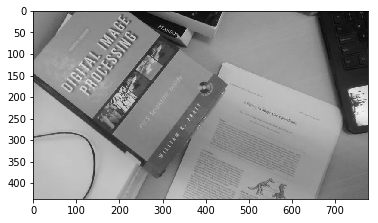

In [2]:
img1 = plt.imread('img1.jpg')
print(img1.shape)
imgplot = plt.imshow(img1)
plt.gray()
plt.show()

In [3]:
def eqsolve(x,y):
    r1 = x
    r2 = x + 1
    c1 = y
    c2 = y + 1
    mata = np.array([[r1 , c1 , r1*c1 , 1],[r1 , c2 , r1 * c2 , 1],[r2 , c1 , r2*c1 , 1],[r2 , c2 , r2*c2 , 1]])
    matI = np.array([[img1[r1][c1]] , [img1[r1][c2]] , [img1[r2][c1]] , [img1[r2][c2]]])
    matinv = inv(mata)
    coeff = np.dot(matinv,matI)
    return coeff

In [5]:
def Bi_linear(x,y,theta_rad):
    Mangle = np.array([[np.cos(theta_rad) , np.sin(-theta_rad)] , [np.sin(theta_rad) , np.cos(theta_rad)]])
    new  = np.dot(inv(Mangle), np.array([[x],[y]]))
    mx = new[1][0]
    my = new[0][0]
    coeff = eqsolve(mx,my) 
    new_intensity = int(coeff[0] * newx + coeff[1] * newy + coeff[2] * newx * newy + coeff[3])
    return new_intensity

In [6]:
def img_corner_points(M,N,img,theta_rad):
    centery = int(M/2)
    centerx = int(N/2)
    #print(M,N)
    #print(centerx,centery)
    newcorner = np.zeros(shape=(2,2))
    oldcorner = np.array([[0-centerx , 0-centery],[0-centerx , N-centery],[M-centerx , 0-centery] , [M-centerx , N-centery]])
    Mangle = np.array([[np.cos(theta_rad) , np.sin(-theta_rad)] , [np.sin(theta_rad) , np.cos(theta_rad)]])
    newcorner = np.dot(oldcorner,Mangle) + np.array([[centerx , centery]])
    newcorner = newcorner.astype(int)
    min_cordinatex = min(newcorner[:,0])
    min_cordinatey = min(newcorner[:,1])
    #print(newcorner)
    if(min_cordinatex < 0):
        min_cordinatex = abs(min_cordinatex)
    else:
        min_cordinatex = 0
    if(min_cordinatey < 0):
        min_cordinatey = abs(min_cordinatey)
    else:
        min_cordinatey = 0
    newcorner = newcorner + np.array([[min_cordinatex , min_cordinatey]])
    offset = np.array([min_cordinatex, min_cordinatey])
    #print(newcorner)
    return newcorner,offset

In [7]:
def myrotate(img,theta):
    #Getting the Shape of Original Matrix 
    M = img.shape[0] - 1
    N = img.shape[1] - 1
    centerx = int(M/2)
    centery = int(N/2)

    #print(img_rotate.shape)
    #print(img_rotate.shape)
    #Converting Angle(Rad) to degree
    theta_rad = np.deg2rad(theta)
    #Defining Angle Matrix 
    Mangle = np.array([[np.cos(theta_rad) , np.sin(-theta_rad)] , [np.sin(theta_rad) , np.cos(theta_rad)]])
    #print(Mangle)
    #Getting the central pixels (considered to be origin)
    #print(centerx,centery)
    #Calculating corner points
    corner , offset = img_corner_points(M,N,img,theta_rad)
    #print(offset)
    #N1 = max(corner[:,0])*2 #int(N*(2**0.5)) + 1#max(corner[:,0]) 
    #M1 = max(corner[:,1])*2 #int(N*(2**0.5)) + 1#max(corner[:,1]) 
    N1 = 1000
    M1 = 1000
    new_centery = int(M1/2)
    new_centerx = int(N/2)
    img_rotate = np.zeros(shape=(M1 +1,N1+1))
    for i in range(N1):
        for j in range(M1):
            #x1 = np.cos(theta) * (i-centerx) + np.sin(theta) * (j - centery) + centerx
            #y1 = np.sin(theta) * (i-centerx) - np.cos(theta) * (j - centery) + centery
            newcord = np.dot(inv(Mangle) , np.array([[i-centery] , [j-centerx]]))
            newy1 = int(newcord[1][0] + centery )
            newx1 = int(newcord[0][0]  + centerx )
            newcord = newcord.astype(int)
            #print(newcord[0][0])
            if(newx1 <= N and newy1 <= M and newx1 > 0 and newy1 > 0):
                img_rotate[j][i] = img[newy1][newx1]
                #img_rotate[j][i] = Bi_linear(newy1,newx1,theta_rad)
            #img_rotate[int(x1)][int(y1)] = img[i][j]
            #print(newcord.shape)
    
    
    
    '''for i in [0 , M]:
        for j in [0 , N]:
            newcord = np.dot(Mangle , np.array([[i] , [j]]))
            img_rotate[i][j]= img[int(newcord[0])][int(newcord[1])]
            newcord = np.dot(Mangle , np.array([[i] , [j]])) + centerpixel
            for jd in [0,1]:
                if jd == 0:
                    if newcord[jd] > M or newcord[jd] < 0 :
                        newcord[jd] = M
                else:
                    if newcord[jd] > N or newcord[jd] < 0 :
                        newcord[jd] = N     
            print(int(newcord[0]) ,int(newcord[1]))
            img_rotate[int(newcord[0])][int(newcord[1])] = img[i][j] 
            #print(img_rotate[int(newcord[0])][int(newcord[1])])'''
    return img_rotate

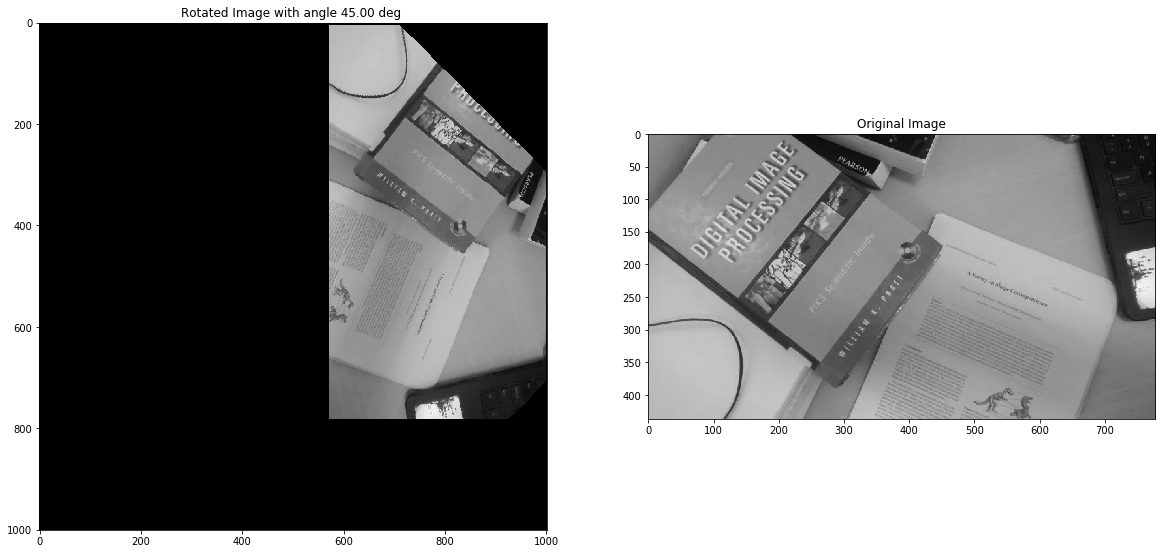

In [9]:
theta = 45
Rotated_img = myrotate(img1,theta)
Rotated_img = myrotate(Rotated_img,theta)
#Rotated_img = myrotate(Rotated_img,theta)
#Rotated_img = myrotate(Rotated_img,theta)
plt.figure(figsize=(20,20))
plt.subplot(121)
plt.title("Rotated Image with angle %0.2f deg " %theta)
plt.imshow(Rotated_img)
plt.subplot(122)
plt.imshow(img1)
plt.title("Original Image")
plt.show()